# Jaka Rizmal

Gručenje držav glede na podobnost rasti okuženih za Covid-19.

In [31]:
import pandas as pd

# Reading data
dataFrame = pd.read_table("../podatki/corona_latest.csv",sep=",",usecols=[0,4,5,6,9])

# Converting column to datetime dtype
dataFrame["dateRep"] = pd.to_datetime(dataFrame["dateRep"],format= "%d/%m/%Y")

# Extracting min and max dates
dateMin = dataFrame["dateRep"].min()
dateMax = dataFrame["dateRep"].max()

dataFrame.dtypes

dateRep                    datetime64[ns]
cases                               int64
deaths                              int64
countriesAndTerritories            object
popData2018                       float64
dtype: object

In [33]:
# Creating a weekly date range
dateRange = pd.date_range(dateMin,dateMax,freq="W")

# Getting all countries
countries = dataFrame["countriesAndTerritories"].unique()

In [48]:
weeklyStats = dict()

# Iterate through countries and calculate weekly cases and deaths
for currentCountry in countries:
    weeklyStats[currentCountry] = []
    rows = dataFrame[dataFrame["countriesAndTerritories"]==currentCountry]
    for i in range(len(dateRange)):
        if i >= len(dateRange)-1:
            break
        # Select rows between this and next dateRange item
        week = rows[(rows["dateRep"]>=dateRange[i])&(rows["dateRep"]<dateRange[i+1])]
        # Iterate through weeks and sum cases and deaths, add to weeklyStats
        weeklyStats[currentCountry].append([week["cases"].sum(),week["deaths"].sum()])    

In [56]:
weeklyCoefs = dict()

# Calculate growth coefficients between weeks
for country in weeklyStats.keys():
    weeks = weeklyStats[country]
    casesCoefs = []
    deathsCoefs = []
    for i in range(len(weeks)):
        if i>=len(weeks)-1:
            break
        if weeks[i][0]==0:
            casesCoefs.append(0)
        else:
            casesCoefs.append(weeks[i+1][0]/weeks[i][0])
        if weeks[i][1] == 0:
            deathsCoefs.append(0)
        else:
            deathsCoefs.append(weeks[i+1][1]/weeks[i][1])
    weeklyCoefs[country]=[]
    weeklyCoefs[country].append(casesCoefs)
    weeklyCoefs[country].append(deathsCoefs)

In [78]:
import random
random.seed(66)
labels = random.sample(list(weeklyCoefs.keys()),100)

caseMatrix = []
deathMatrix = []

# Create a matrix of coefficients
for country in labels:
    caseMatrix.append(weeklyCoefs[country][0])
    deathMatrix.append(weeklyCoefs[country][1])
    
labels = list(weeklyCoefs.keys())

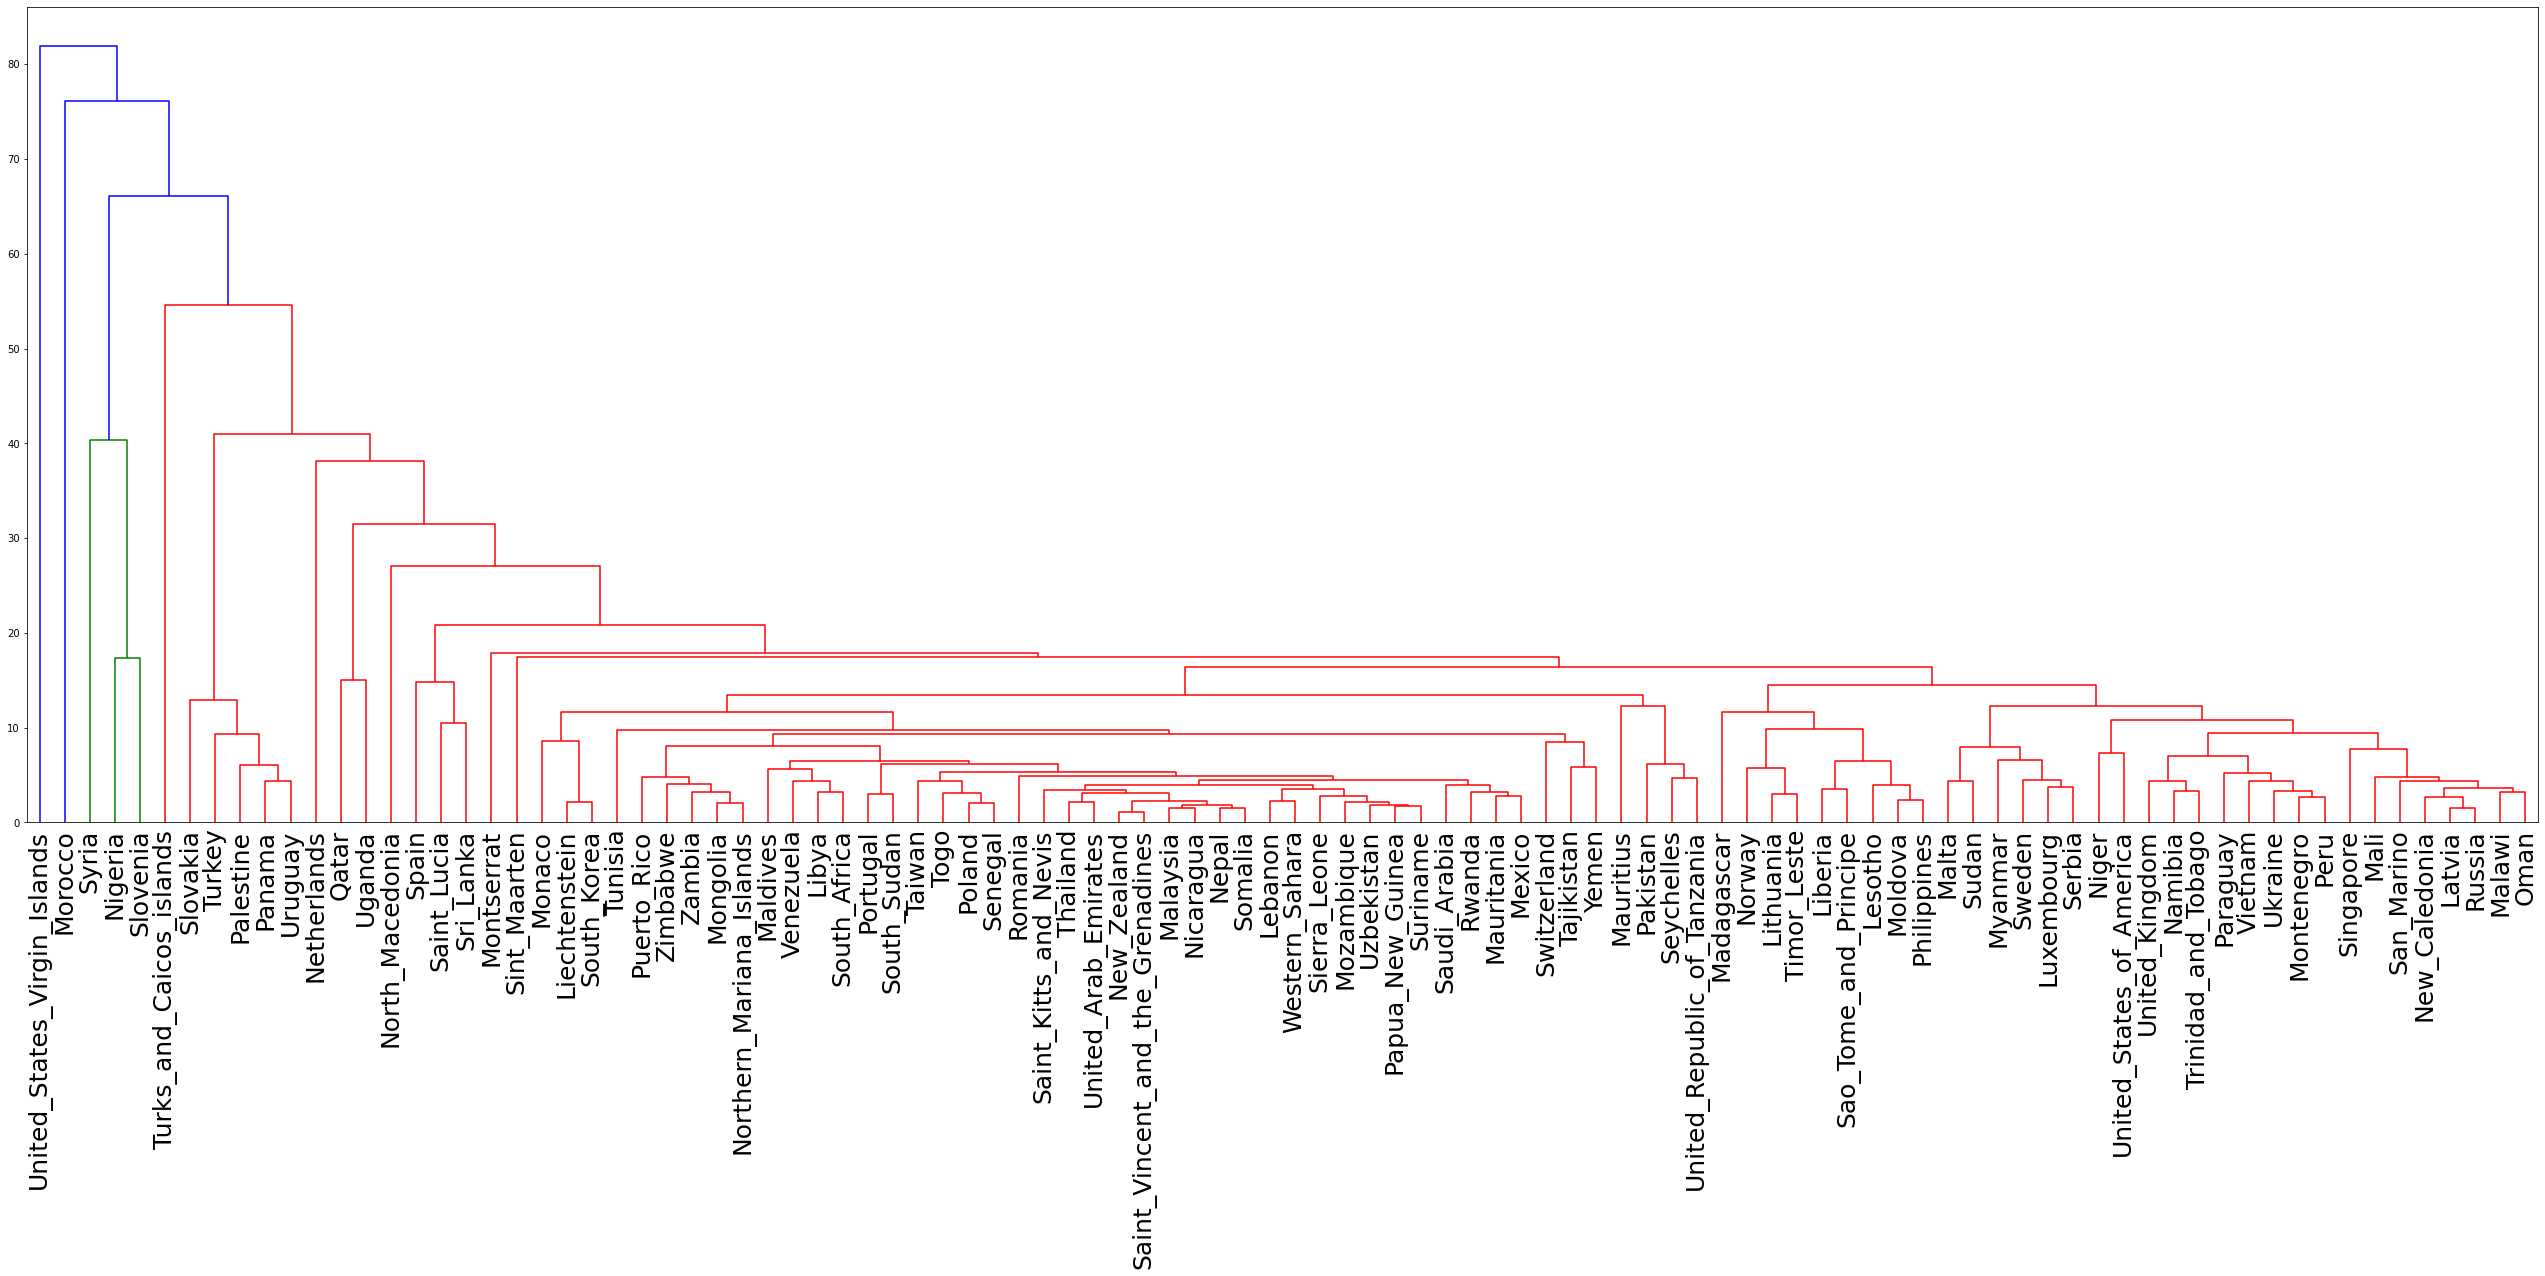

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Create clustering model
linkage = sch.linkage(caseMatrix, method="weighted")
plt.figure(figsize=(45, 15))
dendogram = sch.dendrogram(linkage, labels=labels,leaf_font_size=25)

In [89]:
caseMatrix

[[0,
  0,
  0,
  0,
  0.0,
  0,
  0,
  0,
  4.166666666666667,
  3.7733333333333334,
  2.9605418138987045,
  1.8870101452158345,
  1.0433270082226438,
  0.9569566535313732,
  0.861049519586105,
  0.5811158798283261,
  0.6286136315678413,
  0.8838536421617993],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3.5,
  0.14285714285714285,
  1.0,
  0.0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  2.0,
  9.5,
  2.3157894736842106,
  2.2045454545454546,
  2.350515463917526,
  0.4517543859649123,
  1.116504854368932,
  0.5130434782608696,
  0.4745762711864407,
  1.1785714285714286,
  2.0303030303030303,
  1.4179104477611941],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  9.0,
  7.666666666666667,
  2.9565217391304346,
  1.4313725490196079,
  1.321917808219178,
  0.7694300518134715,
  0.6767676767676768,
  0.7263681592039801,
  0.6095890410958904,
  0.34831460674157305,
  1.3225806451612903],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1.105263157894737,
  0.47619047619047616,


#### TODO
* Kako vpliva starostna porazdelitev populacije na okužbe s covid (št mrtvih,št okuženih) drugače povedano: a je blo v državah s starejšim prebivalstvom več smrti
* gručenje držav glede na podobnost rasti okuženih za covid neodvisno od same populacije, samo rast bi primerjal